 TASK 2. Data Visualization with Matplotlib and Seaborn: </br>
 Load a dataset (e.g., from Kaggle) and create various visualizations </br> (e.g.,
 bar charts, scatter plots, heatmaps) to analyze the data.</br> Use Matplotlib
 and Seaborn for plotting and provide insights based on the visualizations.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset and storing into variable data
data = pd.read_csv('laptop_price_data.csv')
data.head()

,Unnamed: 0,Company,Type,Ram,Weight,Price,Touchscreen,IPS,Cpu brand,HDD,SSD,Gpu brand,Operating System
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [3]:
data.shape # Checking the shape

(1302, 13)

In [4]:
data.size # Checking the size

16926

In [5]:
data.isnull().sum() # Finding null values

Unnamed: 0          0
Company             0
Type                0
Ram                 0
Weight              0
Price               0
Touchscreen         0
IPS                 0
Cpu brand           0
HDD                 0
SSD                 0
Gpu brand           0
Operating System    0
dtype: int64

In [6]:
data.duplicated().sum() # finding duplicate values

np.int64(0)

In [7]:
data['Unnamed: 0'].nunique 

<bound method IndexOpsMixin.nunique of 0          0
1          1
2          2
3          3
4          4
        ... 
1297    1297
1298    1298
1299    1299
1300    1300
1301    1301
Name: Unnamed: 0, Length: 1302, dtype: int64>

In [8]:
data.drop('Unnamed: 0', axis = 1, inplace = True) # Dropping columns
data.columns


Index(['Company', 'Type', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'Operating System'],
      dtype='object')

In [9]:
data.dtypes # Checking the datatypess

Company              object
Type                 object
Ram                   int64
Weight              float64
Price               float64
Touchscreen           int64
IPS                   int64
Cpu brand            object
HDD                   int64
SSD                   int64
Gpu brand            object
Operating System     object
dtype: object

In [10]:
data.describe() # Checking the data consistency

,Ram,Weight,Price,Touchscreen,IPS,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,8.385561,2.039416,59889.058673,0.146697,0.27957,414.101382,183.874040
std,5.085166,0.665274,37251.183866,0.353940,0.44896,515.889348,186.969314
min,2.000000,0.690000,9270.720000,0.000000,0.00000,0.000000,0.000000
25%,4.000000,1.500000,31914.720000,0.000000,0.00000,0.000000,0.000000
50%,8.000000,2.040000,52107.840000,0.000000,0.00000,0.000000,256.000000
75%,8.000000,2.300000,79303.816800,0.000000,1.00000,1000.000000,256.000000
max,64.000000,4.700000,324954.720000,1.000000,1.00000,2000.000000,1024.000000


In [11]:
# Separating categorical and numerical columns
cat_cols = data.dtypes[data.dtypes == 'object'].index
num_cols = data.dtypes[data.dtypes != 'object'].index
print('Numerical Columns:',num_cols)
print('Categorical Columns:',cat_cols)

Numerical Columns: Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'HDD', 'SSD'], dtype='object')
Categorical Columns: Index(['Company', 'Type', 'Cpu brand', 'Gpu brand', 'Operating System'], dtype='object')


In [12]:
# Finding unique values from the categorical columns
for i in cat_cols:
    print(f'Specs: {i} | Unique Count : {data[i].nunique()}')

Specs: Company | Unique Count : 19
Specs: Type | Unique Count : 6
Specs: Cpu brand | Unique Count : 5
Specs: Gpu brand | Unique Count : 3
Specs: Operating System | Unique Count : 3


DATA VISUALISATION OF CATEGORICAL COLUMNS

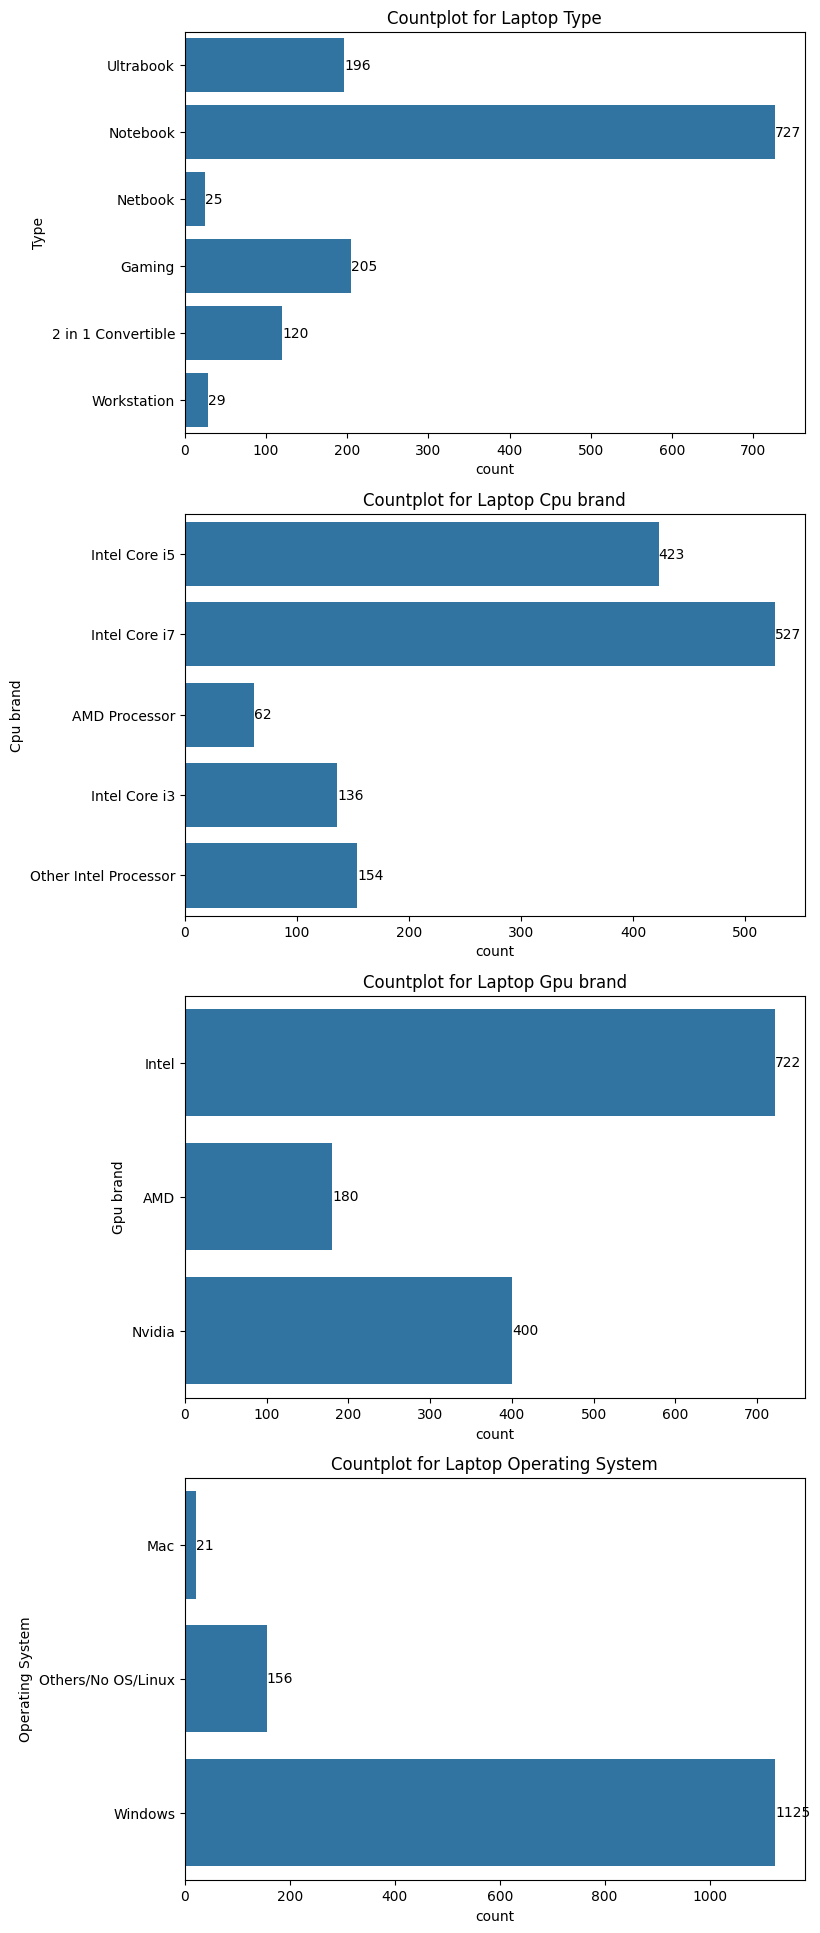

In [13]:
cols = ['Type', 'Cpu brand', 'Gpu brand', 'Operating System']
plt.figure(figsize=(8,24))
for i in range(len(cols)):
    plt.subplot(4,1,i+1)
    ax = sns.countplot(y=data[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for Laptop {cols[i]}')
plt.show()

Insights from the above CountPlot: 

"The data reveals that users predominantly prefer Notebooks over other laptop types, with Gaming Laptops and Ultrabooks following behind. Most users opt for Intel Core i7 processors, with Intel Core i5 being the second most popular choice. Intel GPUs are the most commonly used, followed by Nvidia and AMD GPUs. When it comes to operating systems, Windows remains the top preference among users."


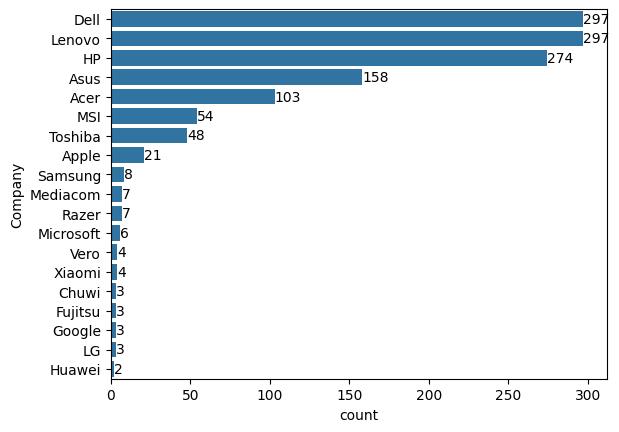

In [14]:
ax = sns.countplot(y = data['Company'],
              order=data['Company'].value_counts().sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.show()

 From the above countplot for Laptop brands, Dell, Lenovo, HP, Asus, Acer, MSI, Toshiba, and Apple are the most frequently purchased laptops.

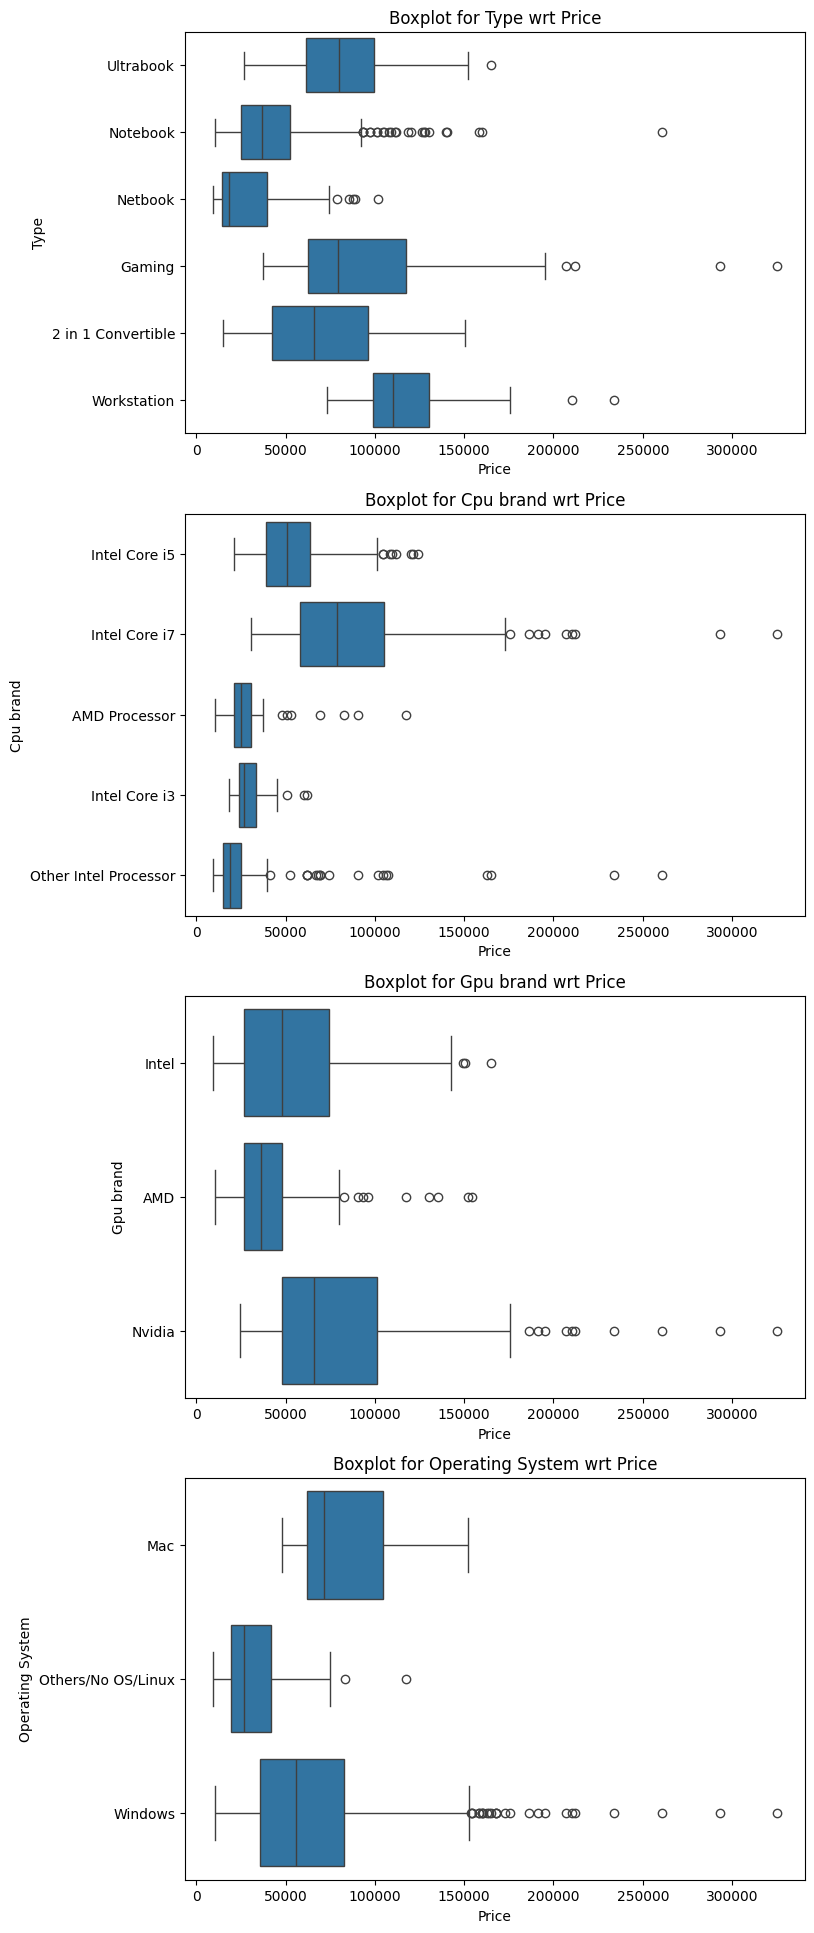

In [15]:
cols = ['Type', 'Cpu brand', 'Gpu brand', 'Operating System']
plt.figure(figsize=(8,24))
for i in range(len(cols)):
    plt.subplot(4,1,i+1)
    sns.boxplot(x =data['Price'], y=data[cols[i]])
    plt.title(f'Boxplot for {cols[i]} wrt Price')
plt.show()

Based on the boxplot above:

1. **Laptop Type vs. Price**: 
   - Ultrabooks and Gaming laptops are generally priced higher, with a wider price range.
   - Notebooks are more affordable, with a narrower price range and several outliers in the higher price range.
   - Workstations have a high price range but show less variance compared to Gaming laptops.

2. **CPU Brand vs. Price**:
   - Laptops with Intel Core i7 CPUs tend to have the highest price variance and outliers, indicating that premium laptops often use this processor.
   - Intel Core i5 CPUs are also in the higher price range, but with less variance compared to i7.
   - AMD processors and other Intel processors tend to be in the lower price range.

3. **GPU Brand vs. Price**:
   - Laptops with Nvidia GPUs have a wider price range, indicating they are used in both mid- to high-end laptops.
   - Intel GPUs tend to dominate the mid-range, while AMD GPUs have a more constrained price range, focusing on budget to mid-range laptops.

4. **Operating System vs. Price**:
   - MacOS laptops are generally more expensive, with a higher price range than other operating systems.
   - Windows-based laptops dominate the mid to high price range with several outliers at the higher end.
   - Laptops with no OS or Linux are more budget-friendly, showing a lower price range.

#### Plotting numerical columns

In [16]:
for i in num_cols:
    print(f'Feature: {i} | Unique Count : {data[i].nunique()}')

Feature: Ram | Unique Count : 9
Feature: Weight | Unique Count : 171
Feature: Price | Unique Count : 791
Feature: Touchscreen | Unique Count : 2
Feature: IPS | Unique Count : 2
Feature: HDD | Unique Count : 6
Feature: SSD | Unique Count : 13


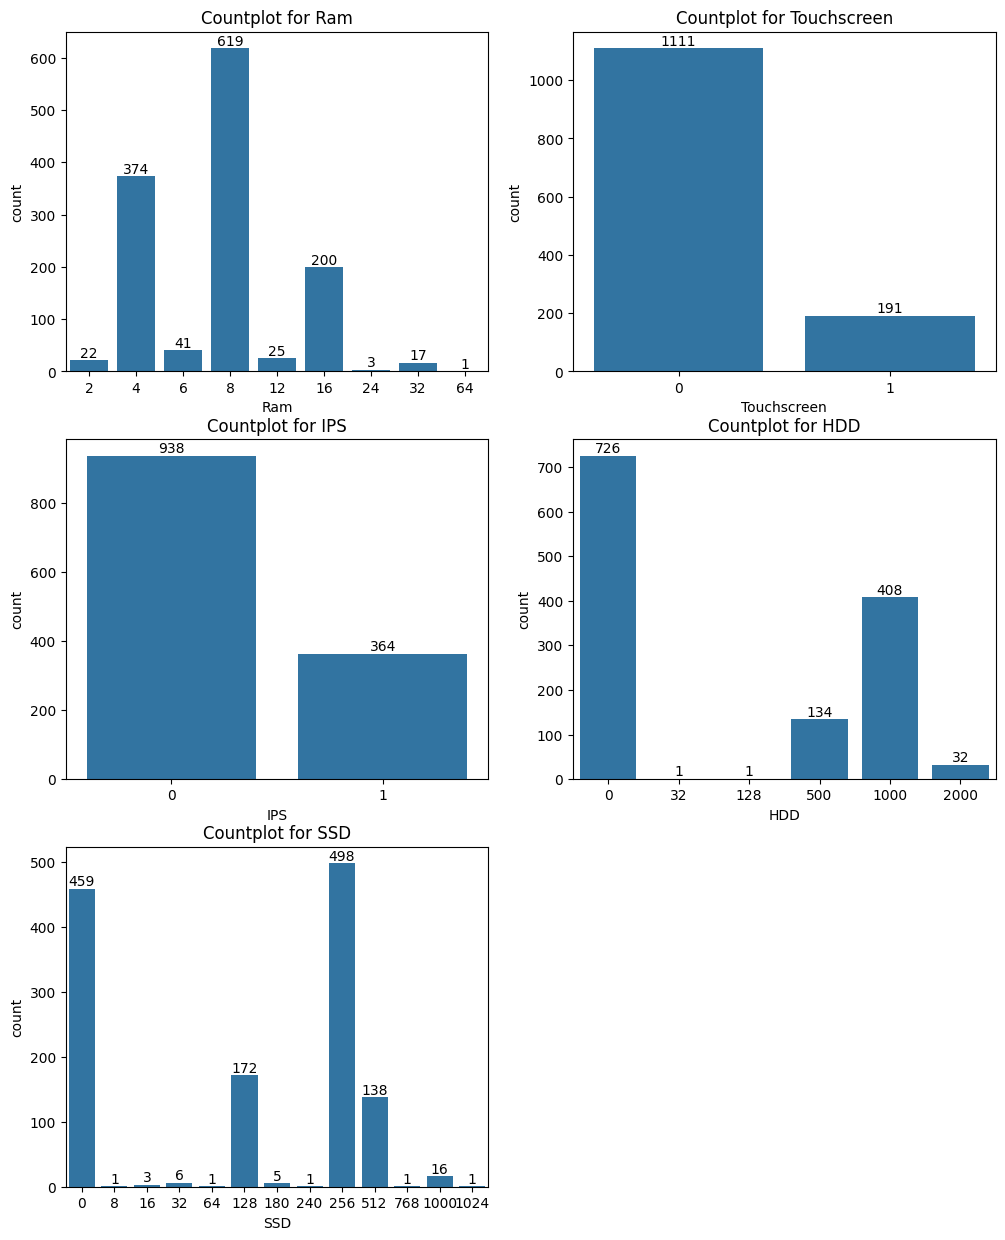

In [17]:
cols = ['Ram','Touchscreen','IPS','HDD','SSD']
plt.figure(figsize=(12,15))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=data[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

Based on the countplots above:

1. **RAM**:
   - The most common RAM size is 8GB, followed by 4GB and 16GB. Very few laptops have RAM sizes above 16GB.
   
2. **Touchscreen**:
   - The majority of laptops do not have a touchscreen feature, with only a small percentage equipped with it.
   
3. **IPS Display**:
   - More laptops lack an IPS display than those that have it, though the gap is not as large as in the touchscreen feature.
   
4. **HDD**:
   - Most laptops either do not have an HDD or come with 1TB. There are a smaller number of laptops with 500GB or 2TB HDDs.
   
5. **SSD**:
   - 0GB SSD (likely HDD-only laptops) and 256GB SSD are the most common configurations, followed by 512GB SSD. Higher SSD capacities are rare.

These insights indicate that 8GB RAM, non-touchscreen displays, and SSDs (particularly 256GB and 512GB) are popular among laptops, with larger storage and RAM configurations being less common.

In [18]:
corr = data[num_cols].corr()
corr

,Ram,Weight,Price,Touchscreen,IPS,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,-0.208766,0.257577
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,-0.093588,0.225311
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,-0.400750,1.000000


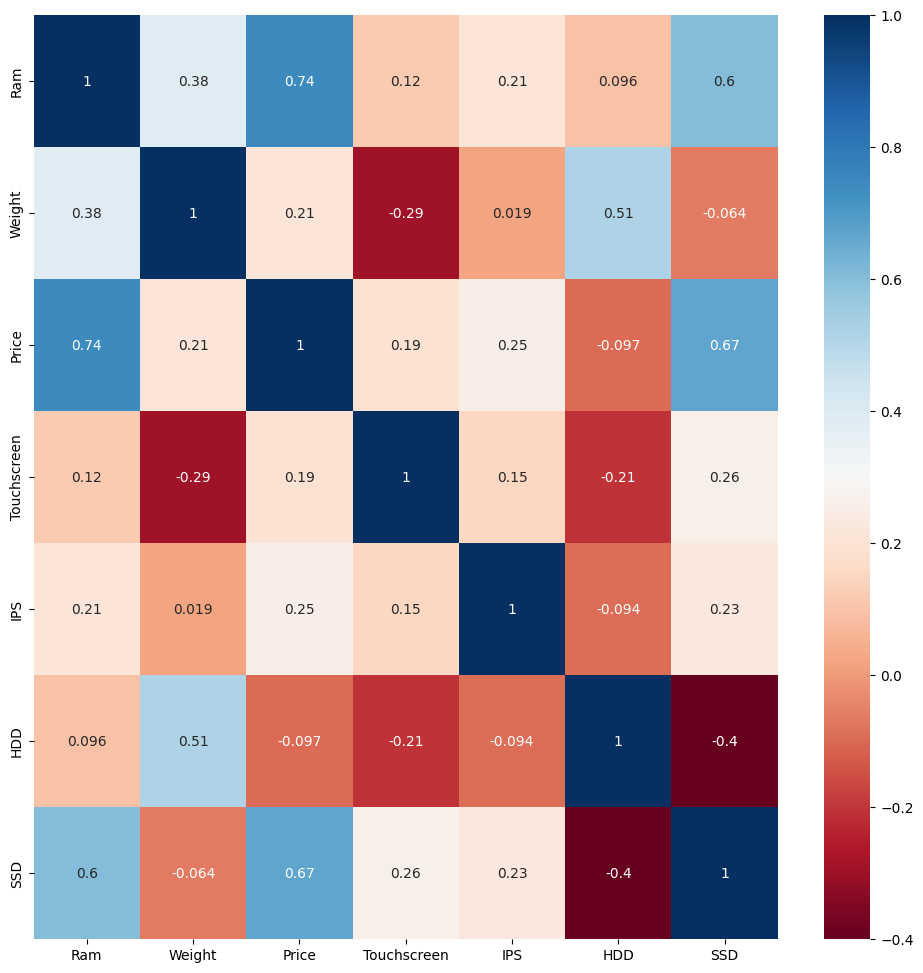

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

Here are the key insights from the correlation heatmap:

1. **RAM and Price**:
   - There is a strong positive correlation between RAM and price (0.74), suggesting that laptops with more RAM tend to be more expensive.

2. **SSD and Price**:
   - SSD capacity also shows a strong positive correlation with price (0.67), indicating that laptops with larger SSDs are typically more expensive.

3. **RAM and SSD**:
   - RAM and SSD are moderately positively correlated (0.60), implying that laptops with more RAM often come with larger SSDs.

4. **HDD and SSD**:
   - There is a moderate negative correlation between HDD and SSD (-0.40), suggesting that laptops with larger SSDs are less likely to have large HDDs.

5. **Weight and Touchscreen**:
   - Weight and touchscreen have a negative correlation (-0.29), meaning that laptops with touchscreens are generally lighter.

6. **Weight and HDD**:
   - There's a moderate positive correlation between weight and HDD size (0.51), indicating that laptops with larger HDDs tend to be heavier.

7. **Other notable correlations**:
   - Weight and RAM (0.38) have a moderate positive correlation, showing that heavier laptops tend to have more RAM.
   - Touchscreen and SSD have a weak positive correlation (0.26), suggesting a slight tendency for laptops with touchscreens to have larger SSDs.

Overall, higher-end laptops (with more RAM, larger SSDs, and higher prices) tend to be correlated, while there's a tradeoff between SSD and HDD usage in laptops.

In summary, users tend to gravitate towards mid-range laptops with 8GB RAM, SSD storage, and Intel processors, while higher-end laptops feature more RAM, larger SSDs, Nvidia GPUs, and are more likely to have touchscreens and IPS displays, driving up their price.